## 1.데이터 불러오기

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### 1-1 그래프에 한글 폰트 적용하기
명령어 실행 후 런타임 다시 시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,010 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
train = pd.read_csv('')
test = pd.read_csv('')
topic_dict = pd.read_csv('')
submission = pd.read_csv('')

### 1-2 데이터확인

train 데이터 확인

,title,topic_idx
0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...
45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,답변하는 배기동 국립중앙박물관장,2


test 데이터 확인

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


topic_dict 확인

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


submission 데이터 확인

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0
...,...,...
9126,54780,0
9127,54781,0
9128,54782,0
9129,54783,0


topic 데이터 갯수 파악

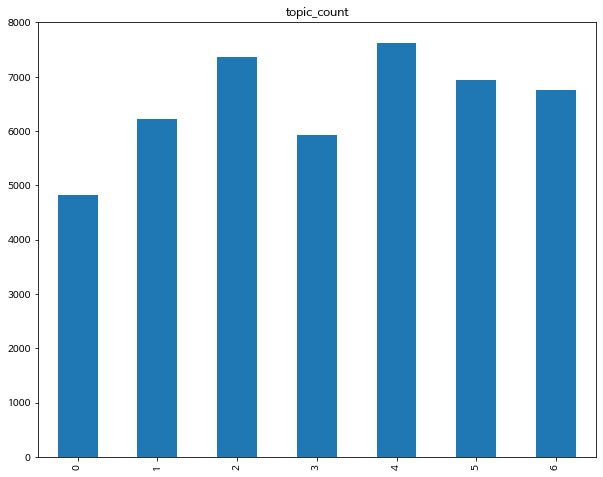

## 2.토큰화

한국어 토큰화 라이브러리 konlpy 설치

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 448 kB 55.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.utils import to_categorical

In [ ]:
from tqdm import tqdm

품사 토큰화

In [ ]:
okt = Okt()
okt.pos('여름이라서 너무 덥다 차가운 아이스크림이 먹고 싶다')

[('여름', 'Noun'),
 ('이라서', 'Josa'),
 ('너무', 'Adverb'),
 ('덥다', 'Adjective'),
 ('차가운', 'Adjective'),
 ('아이스크림', 'Noun'),
 ('이', 'Josa'),
 ('먹고', 'Verb'),
 ('싶다', 'Verb')]

In [ ]:
okt.pos('노력을 이기는 재능은 없고 노력을 외면하는 결과도 없다')

[('노력', 'Noun'),
 ('을', 'Josa'),
 ('이기는', 'Verb'),
 ('재능', 'Noun'),
 ('은', 'Josa'),
 ('없고', 'Adjective'),
 ('노력', 'Noun'),
 ('을', 'Josa'),
 ('외면', 'Noun'),
 ('하는', 'Verb'),
 ('결과', 'Noun'),
 ('도', 'Josa'),
 ('없다', 'Adjective')]

[한국어 품사 태그 비교 차트](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)

위의 사이트에서 어떤 품사 있는지 찾아보고 필요 없는 품사를 제외시키는 함수를 만들어보자!

품사로 토큰화 하지 않고 명사, 형태소로 토큰화해도 상관없음(네이버 리뷰 참조)

In [ ]:
okt_except_pos = [
    'Determiner',
    'Conjunction',
    'Exclamation',
    '더 추가하기!'
]

def apply_konlpy_okt(df):
    

In [ ]:
tokenized_list = apply_konlpy_okt(train['title'])

100%|██████████| 45654/45654 [01:16<00:00, 597.45it/s]


토큰화된 데이터로 새로운 데이터 프레임 만들고 title이 비어있는 행 지우기

비어있는 title 확인

[]

새로운 데이터 프레임 출력

,index,title,topic_idx
45648,45649,금융 미국 스티펠 제휴 선진국 시장 공략,1
45649,45650,보 서울시 교육청 신종 코로나 확산 개학 연기 휴업 검토,2
45650,45651,게시판 키우다 증권 키우다 영웅 전 실전 투자 대회,1
45651,45652,답변 하다 배 기동 국립 중앙 박물관,2
45652,45653,한국 인터넷 기자 시상식 내달 개최 특별상 김성후,2


토픽별로 데이터가 몇 개 있는지 그래프 그려보기

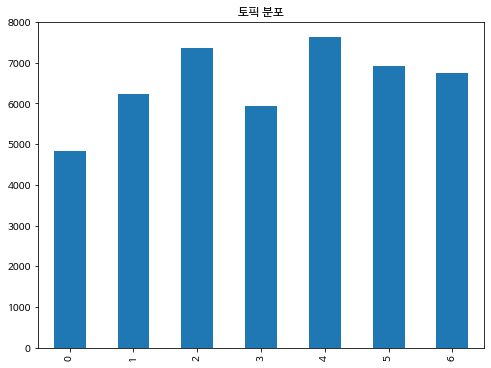

한 문장에 몇개의 단어가 있는지 그래프로 확인하고 데이터프레임에서 평균, 표준편차 등 정보를 출력하기

count    45653.000000
mean         8.209011
std          1.939840
min          1.000000
25%          7.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: title, dtype: float64


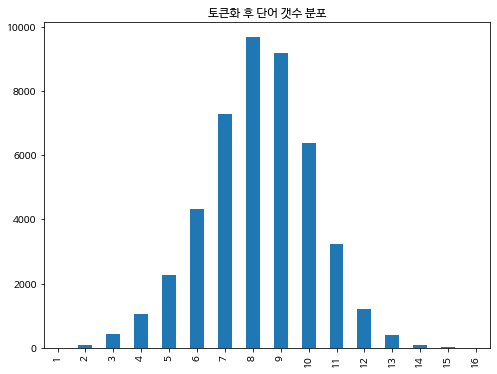

단어 갯수와 문장 길이 설정하기

In [ ]:
MAX_WORD_NUM = 
MAX_LEN = 

단어에 익덱스 설정하기 총 몇 개의 단어가 인덱싱 되었는지 출력하기

26089

Tokenizer 함수인 word_counts, index_word로 해당 단어가 몇 번 등장했는지 볼 수 있다

tokenizer.word_counts['단어']

tokenizer.index_word[인덱스]

2

모델에 입력할 데이터(X) 만들기

(45653, 16)

모델에 입력할 데이터(y) 만들기

(45653, 7)

train, test 데이터로 분리

(41087, 16) (41087, 7)
(4566, 16) (4566, 7)


## 3.모델링

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 16, 100)           1600000   
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 16, 100)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 128)               63744     
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 903       
Total params: 1,664,647
Trainable params: 1,664,647
Non-trainable params: 0
_________________________________________________________________


모델 훈련시키기

Epoch 1/30
578/578 [==============================] - 33s 49ms/step - loss: 0.8451 - accuracy: 0.7106 - val_loss: 0.5079 - val_accuracy: 0.8343
Epoch 2/30
578/578 [==============================] - 28s 48ms/step - loss: 0.3539 - accuracy: 0.8818 - val_loss: 0.5149 - val_accuracy: 0.8265
Epoch 3/30
578/578 [==============================] - 28s 48ms/step - loss: 0.2254 - accuracy: 0.9248 - val_loss: 0.5916 - val_accuracy: 0.8177
Epoch 4/30
578/578 [==============================] - 28s 48ms/step - loss: 0.1592 - accuracy: 0.9476 - val_loss: 0.6824 - val_accuracy: 0.8090


test 데이터로 모델 평가하기

143/143 [==============================] - 1s 5ms/step - loss: 0.6987 - accuracy: 0.8119
Test set
  Loss: 0.699
  Accuracy: 0.812


loss, val_loss 시각화

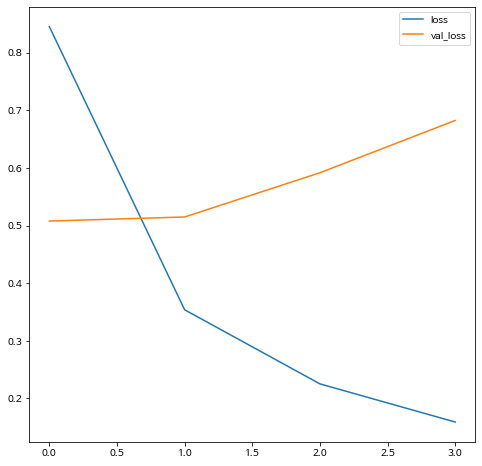

accuracy, val_accuracy 시각화

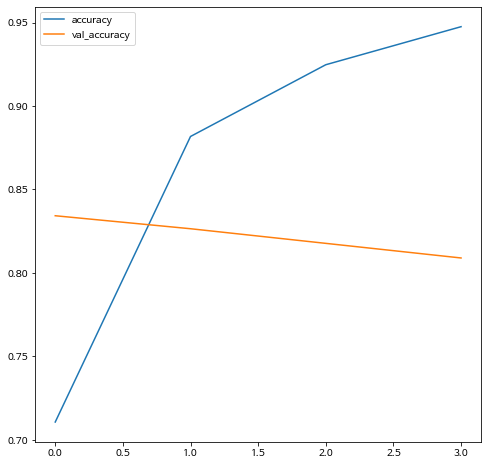

## 4.혼동행렬 그리기

In [ ]:
import plotly.figure_factory as ff

{0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}

In [ ]:
c_matrix = confusion_matrix(model, X_test, y_test)

4566it [00:00, 13125.30it/s]


## 5.dacon 제출하기

필요한거!
- dacon 아이디 생성
- 대회참여하기
- 계정 관리에서 토큰 발급

아래 submission 데이터 프레임의 topic_idx에 모델의 predict한 값 넣어주기

In [ ]:
submission

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0
...,...,...
9126,54780,0
9127,54781,0
9128,54782,0
9129,54783,0


아래의 test 데이터프레임의 title 값들을 위에서 토큰화한 방법을 똑같이 적용하기

In [ ]:
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


In [ ]:
tokenized_sub = apply_konlpy_okt(test['title'])

100%|██████████| 9131/9131 [00:25<00:00, 351.94it/s]


In [ ]:
tokenized_sub[:10]

['유튜브 내달 크리에이터 지원 공간 운영',
 '어버이날 맑다 흐려지다 남부 지방 옅다 황사',
 '내년 국가 평가 때 논문 건수 반영 않다',
 '김명자 신임 과총 회장 원로 젊다 과학자 지혜 모으다 것',
 '회색 인간 작가 김 동식 양심 고백 등 새 소설 집 권 추다 간',
 '야외 생방송 하다 액션 캠 전용 요 금제 잇따르다',
 '월드컵 태극전사 강 전 초기 레오 강 입성 종합',
 '미세먼지 속 출근길',
 '왓츠앱 성나다 레바논 민심 총리 사퇴 이어지다 종합 보',
 '베트남 경제 고 성장 지속 성장']

count    9131.000000
mean        8.153433
std         1.907386
min         1.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        15.000000
dtype: float64


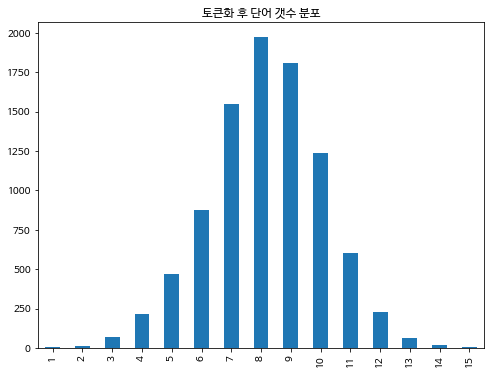

In [ ]:
# word_count = pd.Series(tokenized_sub)
# word_count = word_count.apply(lambda x: len(x.split(' '))).value_counts().sort_index()
# word_count.plot(kind='bar', figsize=(8, 6), title='토큰화 후 단어 갯수 분포');
# print(pd.Series(tokenized_sub).apply(lambda x: len(x.split(' '))).describe())

토큰화된 데이터에 정수 인코딩 적용하기

In [ ]:
X = tokenizer.texts_to_sequences(tokenized_sub)
X = pad_sequences(X, maxlen=MAX_LEN, padding='post')
X.shape

(9131, 16)

모델에 정수 인코딩된 데이터 넣고 값 예측하기

In [ ]:
sub = model.predict(X)
sub.shape

(9131, 7)

In [ ]:
sub[0]

array([3.9414089e-02, 1.9222912e-03, 1.4357825e-01, 8.1329411e-01,
       4.7097422e-04, 1.2714399e-03, 4.8830625e-05], dtype=float32)

sub[0]의 값들 중에서 제일 큰 값의 인덱스 값이 예측한 값이다!
argmax()함수를 이용하여 가장 큰 값의 인덱스 값을 얻는다

In [ ]:
sub_ans = []

for arr in sub:
    sub_ans.append(arr.argmax())

토픽이 어떤 인덱스에 할당되어 있는지 확인

In [ ]:
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


모델에 넣고 예측한 값을 가져온 후 submission 데이터 프레임의 topic_idx에 넣어주기

In [ ]:
submission['topic_idx'] = sub_ans
submission

,index,topic_idx
0,45654,3
1,45655,3
2,45656,2
3,45657,2
4,45658,3
...,...,...
9126,54780,3
9127,54781,2
9128,54782,2
9129,54783,2


submission 데이터 프레임을 sample_submission.csv 파일로 저장하기

In [ ]:
submission.to_csv('sample_submission.csv', index=False)

dacon 제출에 필요한 파일 설치

In [ ]:
!wget 'https://bit.ly/3gMPScE'

--2021-07-23 12:56:35--  https://bit.ly/3gMPScE
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1TYnY2KBU9NuR973pB2oqfFCw2dHgpKX7 [following]
--2021-07-23 12:56:35--  https://drive.google.com/uc?export=download&id=1TYnY2KBU9NuR973pB2oqfFCw2dHgpKX7
Resolving drive.google.com (drive.google.com)... 172.217.214.139, 172.217.214.101, 172.217.214.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h4irohaij7gi7r90pta5c0922qid7r2n/1627044975000/00770885000471893693/*/1TYnY2KBU9NuR973pB2oqfFCw2dHgpKX7?e=download [following]
--2021-07-23 12:56:36--  https://doc-14-9o-docs.googleusercontent.com/docs/secur

In [ ]:
!ls

3gMPScE  gdrive  sample_data  sample_submission.csv


In [ ]:
import zipfile
with zipfile.ZipFile('3gMPScE', 'r') as existing_zip:
    existing_zip.extractall('data')

In [ ]:
!pip install data/dacon_submit_api-0.0.4-py3-none-any.whl

Processing ./data/dacon_submit_api-0.0.4-py3-none-any.whl


파일이름, 발급받은 토큰, 대회숫자, 팀 이름을 차례대로 입력한 후 실행하기

{'isSubmitted': True, 'detail': 'Success'} <- 이렇게 나오면 성공!


In [ ]:
from dacon_submit_api import dacon_submit_api 

result = dacon_submit_api.post_submission_file(
'sample_submission.csv', 
'', 
'235747',
'')

{'isSubmitted': True, 'detail': 'Success'}


test 데이터에 대한 결과 보러가기~

(dacon 해당 대회에 들어가서 리더보드 클릭하면 점수 나옴)